In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

In [80]:
import json

# Load the category_id JSON
with open('FR_category_id.json', 'r') as f:
    cat_data = json.load(f)

# Build mapping: {category_id: category_name}
category_map = {}
for item in cat_data['items']:
    category_id = int(item['id'])  
    title = item['snippet']['title']
    category_map[category_id] = title
    print(title, category_id)

Film & Animation 1
Autos & Vehicles 2
Music 10
Pets & Animals 15
Sports 17
Short Movies 18
Travel & Events 19
Gaming 20
Videoblogging 21
People & Blogs 22
Comedy 23
Entertainment 24
News & Politics 25
Howto & Style 26
Education 27
Science & Technology 28
Movies 30
Anime/Animation 31
Action/Adventure 32
Classics 33
Comedy 34
Documentary 35
Drama 36
Family 37
Foreign 38
Horror 39
Sci-Fi/Fantasy 40
Thriller 41
Shorts 42
Shows 43
Trailers 44


In [57]:
df = pd.read_csv('../Data/clean/cleaned_youtube_trending.csv')
print(df.shape)
df.head()

(152946, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [58]:
df.columns
type(df)
df['category_id'].isnull().sum()


np.int64(1066)

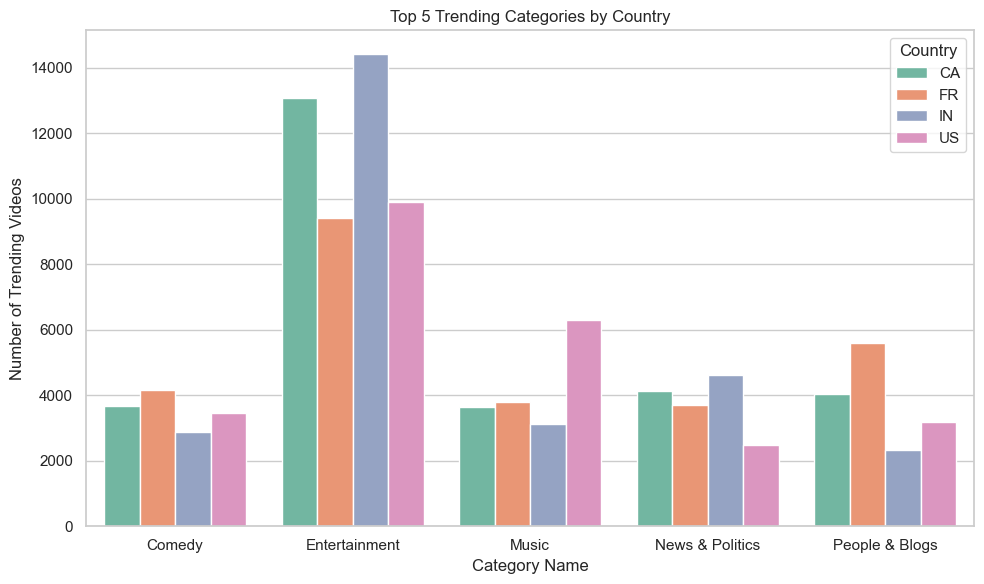

In [59]:
#Q Which countries has the most content for the top5 global categories?

# Cleaning and adding Coloumn names for each coloumn from the extracted JSON data
df.columns = df.columns.str.strip()
df['category_name'] = df['category_id'].map(category_map)

# Finding top categories globally
top5_ids = (
    df['category_id']
    .value_counts()
    .head(5)
    .index.tolist()
)

filtered = df[df['category_id'].isin(top5_ids)]

top_cats_clean = (
    filtered.groupby(['country', 'category_name'])
    .size()
    .reset_index(name='count')
)

# Bar Plot category_name vs Number of trending vids
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_cats_clean,
    x='category_name',
    y='count',
    hue='country',
    palette='Set2'
)
plt.title('Top 5 Trending Categories by Country')
plt.xlabel('Category Name')
plt.ylabel('Number of Trending Videos')
plt.legend(title='Country')
plt.tight_layout()
plt.show()



                        channel_title  trending_count
0  The Late Show with Stephen Colbert             550
1                           VikatanTV             511
2                         RadaanMedia             459
3                                 WWE             438
4         Late Night with Seth Meyers             423
                        channel_title  trending_count         views  \
0  The Late Show with Stephen Colbert             550  1.057402e+06   
1                           VikatanTV             511  6.421459e+05   
2                         RadaanMedia             459  3.717633e+05   
3                                 WWE             438  2.230666e+06   
4         Late Night with Seth Meyers             423  1.108104e+06   

          likes  comment_count  
0  14183.840000    1731.887273  
1   3576.440313     526.966732  
2   1858.302832     252.294118  
3  37075.767123    4575.826484  
4  13539.787234    1683.888889  


/var/folders/6j/bk1vv0m51571vdd8rzdg407m0000gn/T/ipykernel_1121/135024441.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_creators, x='channel_title', y='views', palette='Set3')


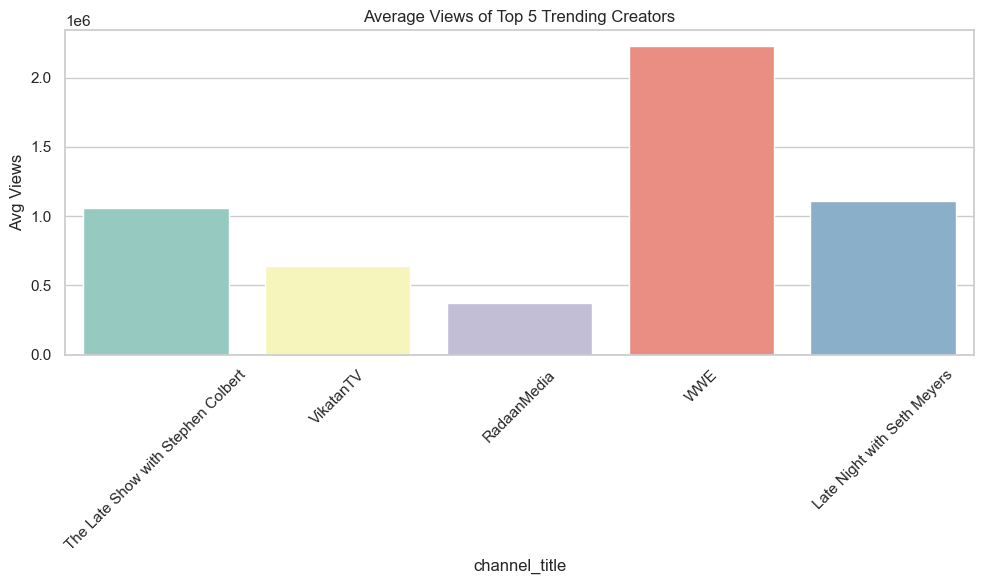

In [63]:
# Which creators consistently get on the trending list, and how do their videos perform?

#Highest Trending Creators
creator_counts = (
    df['channel_title']
    .value_counts()
    .reset_index()
    .rename(columns = {'index': 'channel_title', 'count': 'trending_count'})

)

creator_counts_sorted = creator_counts.sort_values(by='trending_count', ascending=False)
print(creator_counts_sorted.head())


#Creator Statistics

creator_stats = (
    df.groupby('channel_title')
    [['views', 'likes', 'comment_count']]
    .mean()
    .reset_index()
)

# Merge count + performance
creator_summary = pd.merge(creator_counts, creator_stats, on='channel_title')

creator_summary = creator_summary.sort_values(by='trending_count', ascending=False)
print(creator_summary.head())




#Visualize

top5_creators = creator_summary.head(5)

# Plot: Avg Views per Top Creator
plt.figure(figsize=(10, 6))
sns.barplot(data=top5_creators, x='channel_title', y='views', palette='Set3')
plt.title('Average Views of Top 5 Trending Creators')
plt.ylabel('Avg Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
#Q What factors contribute most to a video's popularity?
import re
from collections import Counter


top_videos = df.sort_values(by=['views', 'likes'], ascending=False).head(500)
all_titles = ' '.join(top_videos['title'].dropna().astype(str))

words = re.findall(r'\b\w+\b', all_titles.lower())
stopwords = set(['the', 'and', 'for', 'with', 'this', 'that', 'from', 'you', 'your', 'what', 'how', 'are', 'who', 'when', 'why', 'a', 'an', 'of', 'to', 'in', 'on', 'is', 'it', 'at', 'as', 'by', 'new'])  # basic list
words_cleaned = [w for w in words if w not in stopwords and len(w) > 2]

# Count top words
word_counts = Counter(words_cleaned)
top_words = word_counts.most_common(15)

pd.DataFrame(top_words, columns=['Word', 'Frequency'])



,Word,Frequency
0,official,303
1,video,176
2,trailer,103
3,marvel,47
4,studios,47
5,avengers,47
6,infinity,47
7,war,47
8,love,36
9,sanju,36


In [67]:
tag_lists = top_videos['tags'].dropna().apply(lambda x: x.lower().split('|'))
all_tags = [tag.strip() for tag_list in tag_lists for tag in tag_list if tag.lower() != '[none]']

# Count tag frequency
tag_counts = Counter(all_tags)
print("\n Top 20 Tags:")
print(tag_counts.most_common(20))


 Top 20 Tags:
[('"pop"', 86), ('"rap"', 52), ('"daddy yankee"', 49), ('"comics"', 47), ('"comic books"', 47), ('"super hero"', 47), ('"superhero"', 47), ('"avengers"', 47), ('"infinity war"', 47), ('marvel', 45), ('"official"', 43), ('"official trailer"', 42), ('"ed sheeran"', 39), ('"records"', 38), ('"sanjay dutt biopic"', 36), ('"ranbir kapoor"', 36), ('"official video"', 34), ('childish gambino', 31), ('"this is america"', 31), ('"mcdj recording/rca records"', 31)]


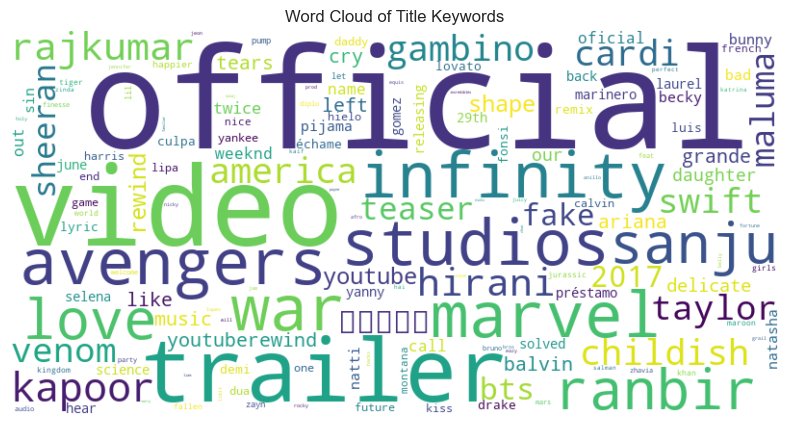

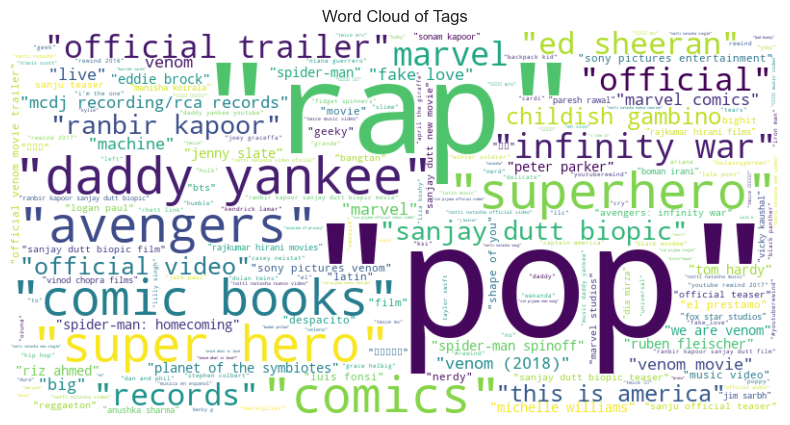

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud for Title Words
wc_title = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wc_title, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Keywords')
plt.show()

# WordCloud for Tags
wc_tags = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wc_tags, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tags')
plt.show()


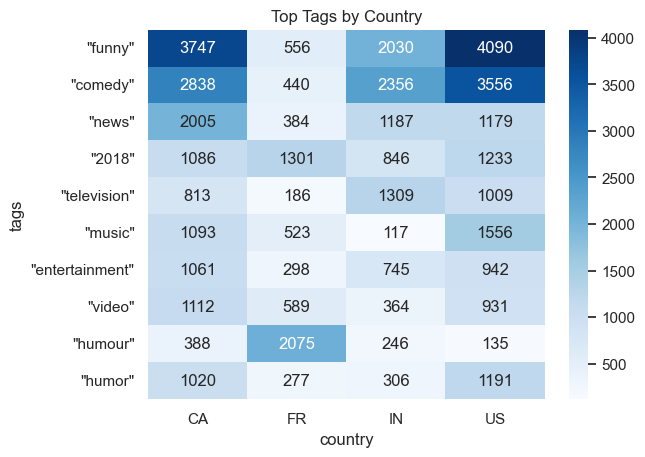

In [78]:
df = df[df['tags'].notna()]
df = df[df['tags'].str.lower() != '[none]']
tag_country = df[df['tags'].notna()].copy()
tag_country['tags'] = tag_country['tags'].str.lower().str.split('|')
tag_country_exploded = tag_country.explode('tags')
tag_pivot = pd.crosstab(tag_country_exploded['tags'], tag_country_exploded['country'])
top_tags = tag_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
sns.heatmap(tag_pivot.loc[top_tags], cmap='Blues', annot=True, fmt='d')
plt.title('Top Tags by Country')
plt.show()
